In [ ]:
# Data Handling and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imputation and Preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import FactorAnalysis

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Explainability
import shap

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [ ]:
df = pd.read_csv('/content/7.csv')

print(df.shape)
print(df.head())


(3111, 53)
              Athlete        Date Day.of.Week  Body.Weight  Peak.Power  \
0  Athlete 1 Bergdorf  01-01-2022         NaN          NaN         NaN   
1  Athlete 1 Bergdorf  01-10-2022      Monday         77.8      3451.0   
2  Athlete 1 Bergdorf  01-11-2022         NaN          NaN         NaN   
3  Athlete 1 Bergdorf  01-12-2022         NaN          NaN         NaN   
4  Athlete 1 Bergdorf   1/13/2022    Thursday          NaN         NaN   

   Peak.Power.BM   RSI  Jump.Height Week.Trimp.Total  Daily.Average  ...  \
0            NaN   NaN          NaN              NaN            NaN  ...   
1           44.4  0.33          9.0             4666          933.2  ...   
2            NaN   NaN          NaN              NaN            NaN  ...   
3            NaN   NaN          NaN              NaN            NaN  ...   
4            NaN   NaN          NaN              NaN            NaN  ...   

  Number.of.accelerations...1.99....1.00.m.s².  \
0                                    

In [ ]:
print(df.describe())
print(df.info())

       Body.Weight   Peak.Power  Peak.Power.BM         RSI  Jump.Height  \
count   225.000000   224.000000     224.000000  186.000000   224.000000   
mean     75.330222  3353.799107      44.638839    0.377742    10.642411   
std       5.964573   365.002377       4.430880    0.078094     1.443226   
min      61.600000  2357.000000      35.000000    0.200000     5.800000   
25%      71.600000  3107.000000      41.600000    0.330000     9.600000   
50%      74.300000  3318.000000      44.200000    0.365000    10.600000   
75%      78.100000  3544.250000      46.800000    0.410000    11.625000   
max      90.500000  4772.000000      62.500000    0.670000    14.700000   

       Daily.Average  RT.Volume.Load  HR.min..bpm.  HR.avg..bpm.  \
count     334.000000      357.000000   1140.000000   1141.000000   
mean      675.087970     6504.282353     74.176316    133.370727   
std       246.054957     1385.724679     22.507702     18.210133   
min        66.666667     2007.700000     18.000000  

In [ ]:
# Check missing values
for column in df.columns:
    print(f"Column '{column}': {df[column].isna().sum()} null values")



Column 'Athlete': 0 null values
Column 'Date': 0 null values
Column 'Day.of.Week': 1124 null values
Column 'Body.Weight': 2886 null values
Column 'Peak.Power': 2887 null values
Column 'Peak.Power.BM': 2887 null values
Column 'RSI': 2925 null values
Column 'Jump.Height': 2887 null values
Column 'Week.Trimp.Total': 2720 null values
Column 'Daily.Average': 2777 null values
Column 'Weekly.SD': 2720 null values
Column 'Monotony': 2720 null values
Column 'Strain': 2720 null values
Column 'RT.Volume.Load': 2754 null values
Column 'Session.name': 1970 null values
Column 'Type': 1970 null values
Column 'Phase.name': 1970 null values
Column 'Duration': 1970 null values
Column 'Start.time': 1970 null values
Column 'End.time': 1970 null values
Column 'HR.min..bpm.': 1971 null values
Column 'HR.avg..bpm.': 1970 null values
Column 'HR.max..bpm.': 1970 null values
Column 'HR.min....': 1971 null values
Column 'HR.avg....': 1970 null values
Column 'HR.max....': 1970 null values
Column 'Time.in.HR.zone.

In [ ]:
# Drop completely empty rows
df = df.dropna(how='all')
print(df.shape)


(3111, 53)


In [ ]:
# Drop non-numeric columns
for column in df.columns:
    if df[column].dtype == 'object':
        df.drop(column, axis=1, inplace=True)

print(df.shape)
df.to_csv('/content/cleaned_data_Athlete.csv', index=False)

(3111, 35)


In [ ]:
# Imputation
imputer = IterativeImputer(estimator=xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42), max_iter=15, random_state=42)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df_imputed.to_csv('/content/Athlete_imputed.csv', index=False)
print(df_imputed.shape)
print(df_imputed.head())
df_imputed.info()

(3111, 35)
   Body.Weight   Peak.Power  Peak.Power.BM       RSI  Jump.Height  \
0    72.693390  3122.190430      43.350983  0.372530    10.529290   
1    77.800000  3451.000000      44.400000  0.330000     9.000000   
2    74.521927  3140.848877      42.989101  0.307763    10.075773   
3    72.693390  3122.190430      43.350983  0.372530    10.529290   
4    72.379898  3160.592041      42.972767  0.336304    10.394221   

   Daily.Average  RT.Volume.Load  HR.min..bpm.  HR.avg..bpm.  HR.max..bpm.  \
0     644.546570     6685.261719     54.013409    125.328964    183.575623   
1     933.200000     7151.800000     73.000000    147.000000    181.000000   
2     694.401123     7210.197754     60.000000    139.000000    182.000000   
3     644.546570     6685.261719     54.013409    125.328964    183.575623   
4     585.332153     7369.220703     66.000000    139.000000    183.000000   

   ...  Number.of.accelerations...1.99....1.00.m.s².  \
0  ...                                    259.142

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


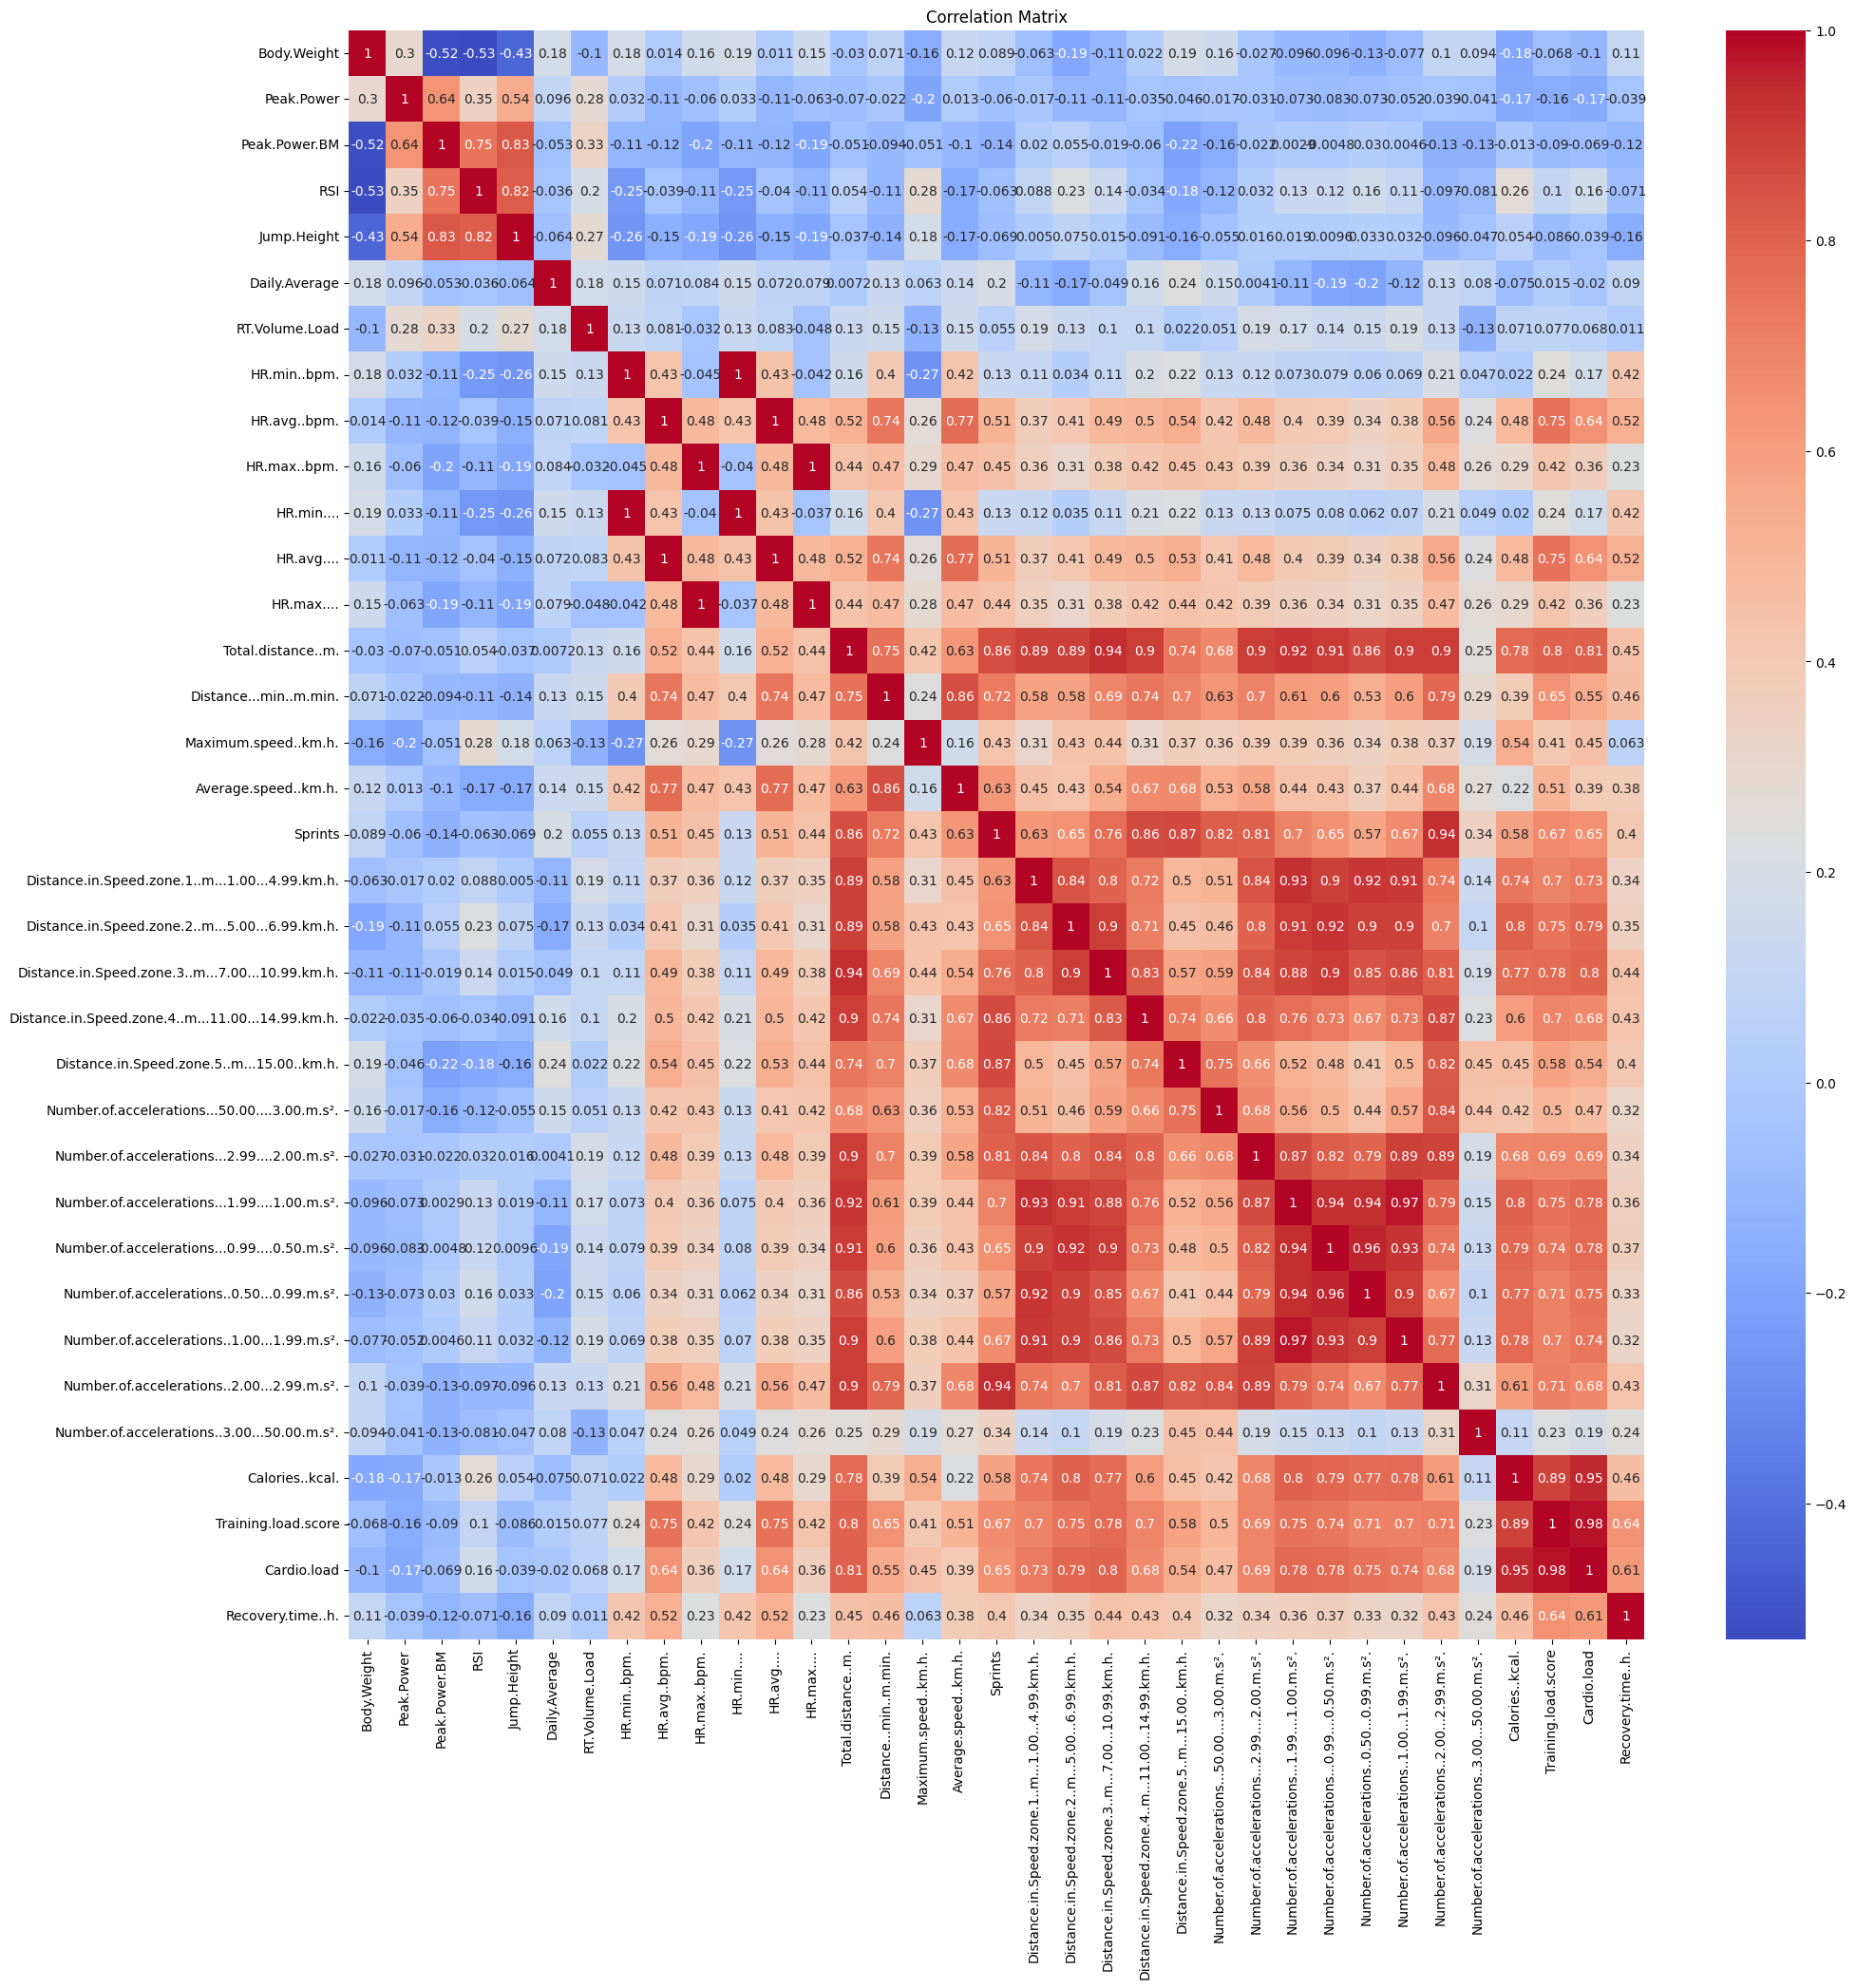

In [ ]:
# Correlation matrix
fig = plt.figure(figsize=(22,22))
corr_matrix = df_imputed.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Standardization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)
print(df_scaled.shape)
print(df_scaled.head())
df_scaled.to_csv('/content/Athlete_scaled.csv', index=False)

(3111, 35)
   Body.Weight  Peak.Power  Peak.Power.BM       RSI  Jump.Height  \
0    -0.320260   -0.171467       0.135015  0.391804     0.310573   
1     1.276880    2.001577       0.616878 -0.696261    -1.851477   
2     0.251632   -0.048157      -0.031214 -1.265160    -0.330592   
3    -0.320260   -0.171467       0.135015  0.391804     0.310573   
4    -0.418308    0.082322      -0.038717 -0.534973     0.119618   

   Daily.Average  RT.Volume.Load  HR.min..bpm.  HR.avg..bpm.  HR.max..bpm.  \
0      -0.100345       -0.071642     -0.459117     -0.231698     -0.285098   
1       2.498020        0.688301      0.676659      1.587446     -0.476701   
2       0.348429        0.783425     -0.101000      0.915897     -0.402310   
3      -0.100345       -0.071642     -0.459117     -0.231698     -0.285098   
4      -0.633374        1.042457      0.257919      0.915897     -0.327919   

   ...  Number.of.accelerations...1.99....1.00.m.s².  \
0  ...                                     -0.172778   

In [ ]:
from sklearn.decomposition import FactorAnalysis

# Define Polar features explicitly
polar_features = [
    'HR.min..bpm.', 'HR.avg..bpm.', 'HR.max..bpm.',
    'HR.min....', 'HR.avg....', 'HR.max....',
    'Time.in.HR.Zone.1..50...59...', 'Time.in.HR.Zone.2..60...69...', # Changed 'zone' to 'Zone'
    'Time.in.HR.Zone.3..70...79...', 'Time.in.HR.Zone.4..80...89...', # Changed 'zone' to 'Zone'
    'Time.in.HR.Zone.5..90...100...', 'Calories..kcal.',
    'Training.load.score', 'Cardio.load', 'Recovery.time..h.'
]

# Confirm feature count and names
print(f"Number of polar features: {len(polar_features)}")
print(f"Polar features: {polar_features}")

# Apply Factor Analysis
fa = FactorAnalysis(n_components=min(3, len(polar_features)), random_state=42)

# Ensure polar_features are present in df_scaled
polar_features = [feature for feature in polar_features if feature in df_scaled.columns] # Check for presence

polar_reduced = fa.fit_transform(df_scaled[polar_features])

# Name components
n_components = polar_reduced.shape[1]
column_names = [f'Factor{i+1}' for i in range(n_components)]

polar_reduced_df = pd.DataFrame(polar_reduced, columns=column_names)

# Combine with target variable (RSI)
df_fa_combined = pd.concat([polar_reduced_df, df_scaled['RSI']], axis=1)
print(df_fa_combined.head())

Number of polar features: 15
Polar features: ['HR.min..bpm.', 'HR.avg..bpm.', 'HR.max..bpm.', 'HR.min....', 'HR.avg....', 'HR.max....', 'Time.in.HR.Zone.1..50...59...', 'Time.in.HR.Zone.2..60...69...', 'Time.in.HR.Zone.3..70...79...', 'Time.in.HR.Zone.4..80...89...', 'Time.in.HR.Zone.5..90...100...', 'Calories..kcal.', 'Training.load.score', 'Cardio.load', 'Recovery.time..h.']
    Factor1   Factor2   Factor3       RSI
0 -0.218163 -0.387280  0.371061  0.391804
1  0.531833  0.560894  0.602325 -0.696261
2  0.006914 -0.091232  0.575467 -1.265160
3 -0.218163 -0.387280  0.371061  0.391804
4  0.509536  0.057957  0.599632 -0.534973


In [ ]:
# Prepare features and target
X = df_fa_combined.drop(columns=['RSI'])
y = df_fa_combined['RSI']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(f"R2 Score with Factor Analysis Features: {r2_score(y_test, y_pred):.2f}")

R2 Score with Factor Analysis Features: 0.35


In [ ]:
# Define features and target
X = df_fa_combined.drop(columns=['RSI'])
y = df_fa_combined['RSI']

# Apply RFE (can be skipped if you want to keep all factors)
model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
n_features_to_select = min(3, X.shape[1])  # Adjusted to number of FA components
selector = RFE(model, n_features_to_select=n_features_to_select)
X_reduced = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.support_]

# Create new DataFrame
df_reduced_fa = pd.DataFrame(X_reduced, columns=selected_features)
df_reduced_fa['RSI'] = y.values

print(df_reduced_fa.shape)
print(df_reduced_fa.head())

# Save reduced dataset
df_reduced_fa.to_csv('/content/Athlete_reduced_FA.csv', index=False)

(3111, 4)
    Factor1   Factor2   Factor3       RSI
0 -0.218163 -0.387280  0.371061  0.391804
1  0.531833  0.560894  0.602325 -0.696261
2  0.006914 -0.091232  0.575467 -1.265160
3 -0.218163 -0.387280  0.371061  0.391804
4  0.509536  0.057957  0.599632 -0.534973


In [ ]:
X = df_reduced_fa.drop(columns=["RSI"])
y = df_reduced_fa["RSI"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 0.55
Mean Squared Error: 0.88
R2 Score: 0.16


In [ ]:
model = RandomForestRegressor(n_estimators=200,random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 0.37
Mean Squared Error: 0.66
R2 Score: 0.36


In [ ]:
model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"XGBoost R2 Score: {r2:.2f}")

Mean Absolute Error: 0.37
Mean Squared Error: 0.68
XGBoost R2 Score: 0.35


 95%|=================== | 2962/3111 [00:22<00:01]       

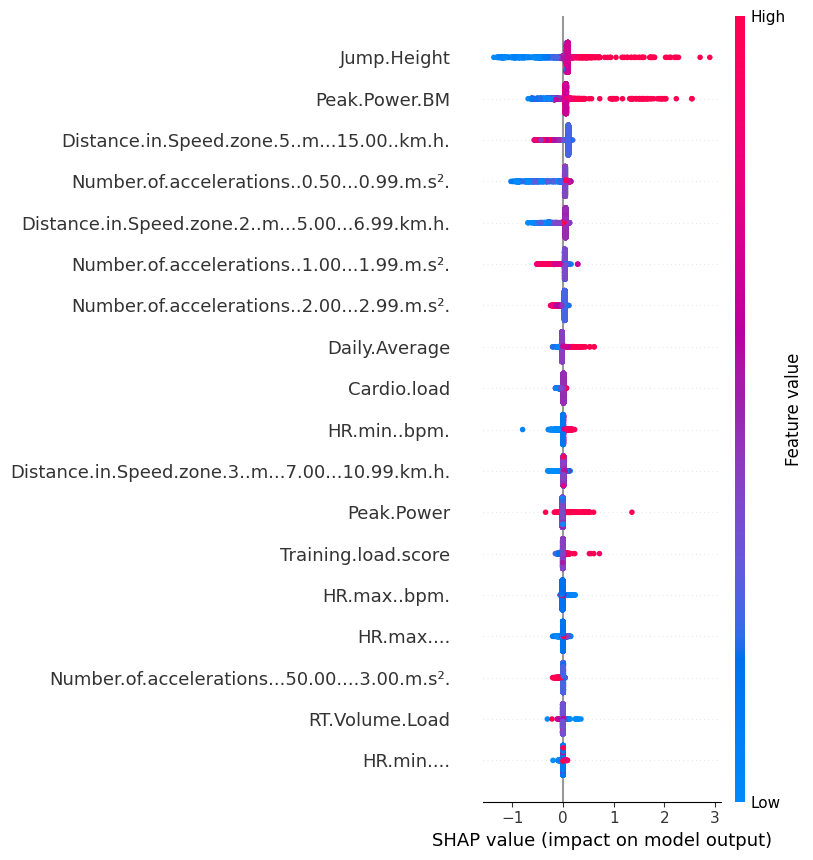

                                             Feature  Importance
2                                        Jump.Height    0.209547
1                                      Peak.Power.BM    0.148969
11        Distance.in.Speed.zone.5..m...15.00..km.h.    0.147605
13        Number.of.accelerations..0.50...0.99.m.s².    0.096905
9    Distance.in.Speed.zone.2..m...5.00...6.99.km.h.    0.087723
14        Number.of.accelerations..1.00...1.99.m.s².    0.064562
15        Number.of.accelerations..2.00...2.99.m.s².    0.049349
3                                      Daily.Average    0.038383
17                                       Cardio.load    0.021794
5                                       HR.min..bpm.    0.020424
10  Distance.in.Speed.zone.3..m...7.00...10.99.km.h.    0.019169
0                                         Peak.Power    0.018372
16                               Training.load.score    0.016202
6                                       HR.max..bpm.    0.015521
8                        

In [ ]:
# SHAP Analysis
explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

shap_importance = np.abs(shap_values.values).mean(axis=0)
feature_importance_array = np.array(list(zip(X.columns, shap_importance)))
shap_importance_df = pd.DataFrame(feature_importance_array, columns=['Feature', 'Importance'])
shap_importance_df['Importance'] = shap_importance_df['Importance'].astype(float)
shap_importance_df = shap_importance_df.sort_values(by='Importance', ascending=False)
print(shap_importance_df)

 97%|=================== | 3024/3111 [00:22<00:00]       

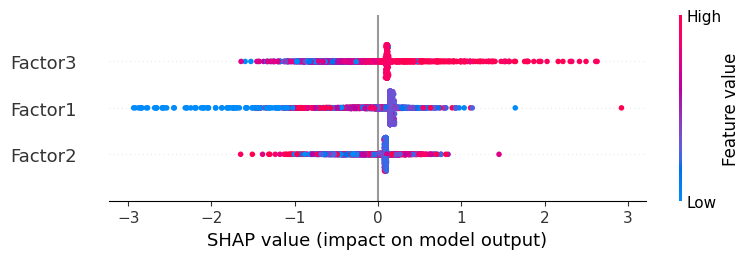

   Feature  Importance
2  Factor3    0.295504
0  Factor1    0.262377
1  Factor2    0.173000


In [ ]:
import shap
import numpy as np
import pandas as pd

# Reuse the trained model and the feature matrix from FA
X = df_reduced_fa.drop(columns=["RSI"])

# SHAP explainer using the trained Linear Regression model
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# SHAP summary plot
shap.summary_plot(shap_values, X)

# Calculate SHAP importance
shap_importance = np.abs(shap_values.values).mean(axis=0)
feature_importance_array = np.array(list(zip(X.columns, shap_importance)))
shap_importance_df = pd.DataFrame(feature_importance_array, columns=['Feature', 'Importance'])
shap_importance_df['Importance'] = shap_importance_df['Importance'].astype(float)
shap_importance_df = shap_importance_df.sort_values(by='Importance', ascending=False)

# Display ranked features
print(shap_importance_df)


In [ ]:
# Extract top features (can be fewer than 12 if there are fewer FA components)
top_features = shap_importance_df['Feature'].head(min(12, len(shap_importance_df))).values

# Select those features
X_selected = df_reduced_fa[top_features]
y = df_reduced_fa["RSI"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Retrain XGBoost
model_xgb = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_test)

# Evaluation
print(f"Optimized XGBoost R2 Score (FA Top Features): {r2_score(y_test, y_pred):.2f}")


Optimized XGBoost R2 Score (FA Top Features): 0.34


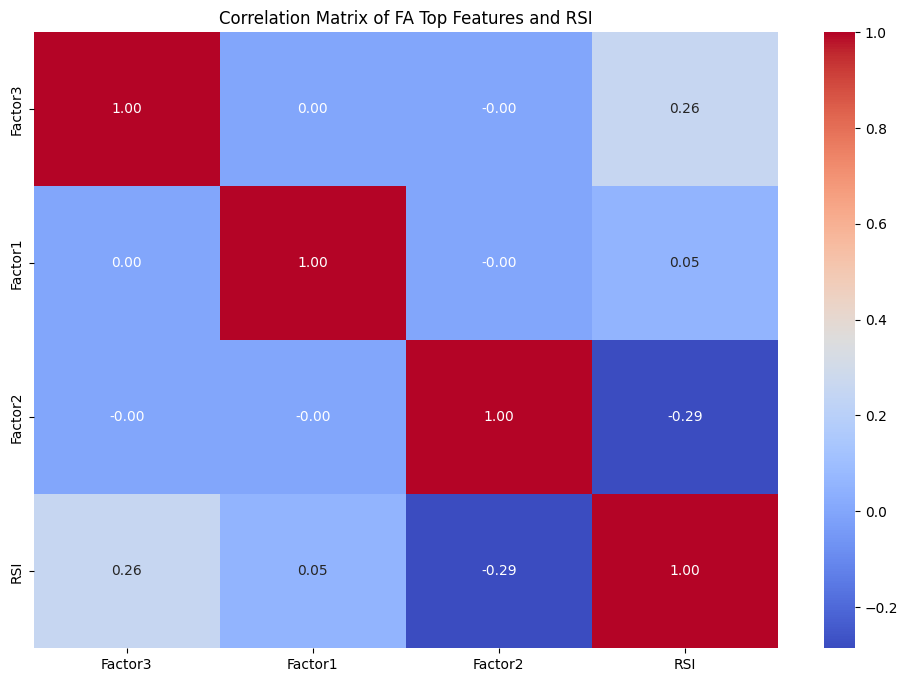

In [ ]:
# Ensure top features exist in df_reduced_fa
selected_features = [feat for feat in top_features if feat in df_reduced_fa.columns] + ['RSI']

# Correlation matrix
corr_matrix = df_reduced_fa[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of FA Top Features and RSI")
plt.show()


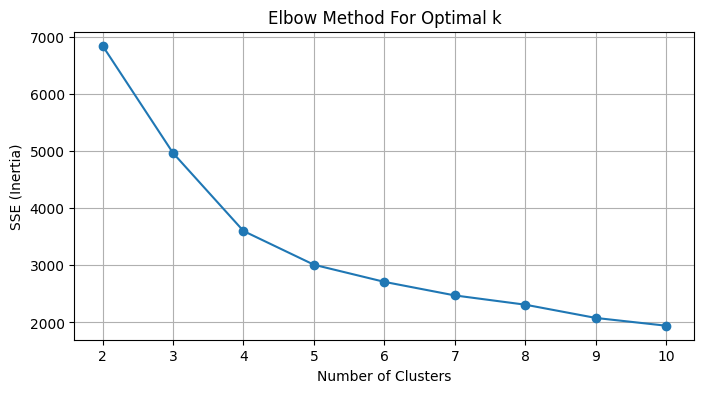

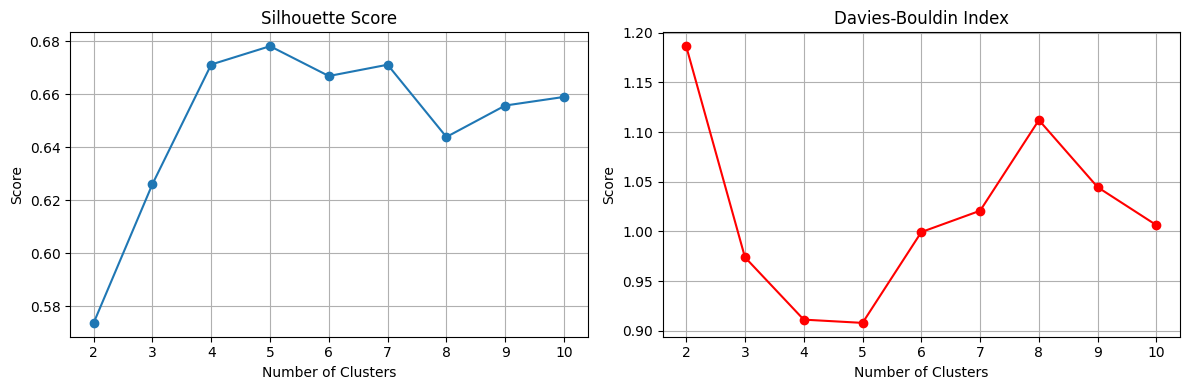


Average Mean of Each Cluster:
          Factor1   Factor2   Factor3       RSI
Cluster                                        
0       -0.188089 -0.354931  0.351802  0.343041
1        0.994043  1.290548 -0.345842 -0.379491
2       -0.613449  1.585251 -2.587150 -1.041009
3       -0.351590 -1.415271 -2.639377 -0.784092
4        2.640503  0.115950  0.160207 -0.459422
5       -2.651460  2.850442  2.360745 -2.427162
6       -1.100874  1.461804 -0.262564 -0.880463


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Step 1: Select top 5 SHAP features from FA
top_5_features = shap_importance_df['Feature'].head(5).values
X_cluster = df_reduced_fa[top_5_features]

# Step 2: Elbow Method to find optimal clusters
sse = []
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(cluster_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Step 3: Silhouette Score and Davies-Bouldin Index
sil_scores = []
db_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_cluster)
    sil_scores.append(silhouette_score(X_cluster, cluster_labels))
    db_scores.append(davies_bouldin_score(X_cluster, cluster_labels))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(cluster_range, db_scores, marker='o', color='red')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.grid(True)

plt.tight_layout()
plt.show()

# Step 4: Final Clustering using k = 7
optimal_k = 7
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_cluster)

# Add cluster labels to FA-reduced dataframe
df_clusters = df_reduced_fa.copy()
df_clusters['Cluster'] = cluster_labels

# Step 5: Analyze mean of each cluster
cluster_summary = df_clusters.groupby('Cluster').mean()
print("\nAverage Mean of Each Cluster:")
print(cluster_summary)

# Optional: Save clustered data
df_clusters.to_csv('/content/clustered_data_FA.csv', index=False)
